In [170]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [171]:
N = 1000
M = 100

Напишем функцию, которая создает $M$ выборок размера $N$ из равномерного распределения на отрезке $[0, \theta]$:

In [172]:
def CreateSamples(theta):
    uniform_rv = sts.uniform(loc=0, scale=theta)
    sample = uniform_rv.rvs(size=(M, N))
    return sample

Создадим $M = 100$ выборок размером $N = 1000$ с $\theta = 2$:

In [173]:
theta = 2
samples = CreateSamples(theta)

Напишем функцию, которая по заданым выборкам считает оценки параметра $\theta$ из теоретической задачи: $2\overline{X},\; (n + 1)X_{(1)},\; X_{(1)} + X_{(n)},\; \frac{n + 1}{n}X_{(n)}$ для каждого фиксированого $n$ и для каждой выборки.

In [174]:
def CreateEstimators(samples):
    estimators = np.zeros((4, N, M))
    for n in range(N):
        estimators[0][n] = np.array([np.mean(samples[m][:n + 1]) * 2 for m in range(M)])
        estimators[1][n] = np.array([(n + 2) * np.min(samples[m][:n + 1]) \
                                     for m in range(M)])
        estimators[2][n] = np.array([np.min(samples[m][:n + 1]) + \
                                     np.max(samples[m][:n + 1]) for m in range(M)])
        estimators[3][n] = np.array([(n + 2) / (n + 1) * \
                                     np.max(samples[m][:n + 1]) for m in range(M)])
    return estimators

Создадим вектор из оценок параметра $\theta$:

In [175]:
estimators = CreateEstimators(samples)

Напишем функцию, которая будет строить график зависимости усредненной по всем выборкам функции потерь $\overline{(\hat{\theta} - \theta)^2}$ от размера выборки $n$ для каждой оценки:

In [178]:
def MakePlot(estimators, theta):
    x = range(1, N+1)
    plt.figure(figsize=(12, 6))
    names = [r'$2\overline{X}$', r'$(n + 1)X_{(1)}$', \
             r'$X_{(1)} + X_{(n)}$', r'$\frac{n + 1}{n}X_{(n)}$']
    
    for estimator, color, name in zip(estimators, ['b', 'y', 'g', 'r'], names):
        plt.plot(x, [np.mean((estimator[n] - theta) ** 2) for n in range(N)], 
                 color, label=name)
    
    plt.title(r"""График зависимости усредненной по всем выборкам функции потерь 
    параметра $\theta$ = {} от размера выборки""".format(theta))
    plt.xlabel("n")
    plt.ylabel(r"$(\hat{\theta} - \theta)^2$")
    plt.legend(loc='best')

Строим график зависимости для $\theta$ = 2:

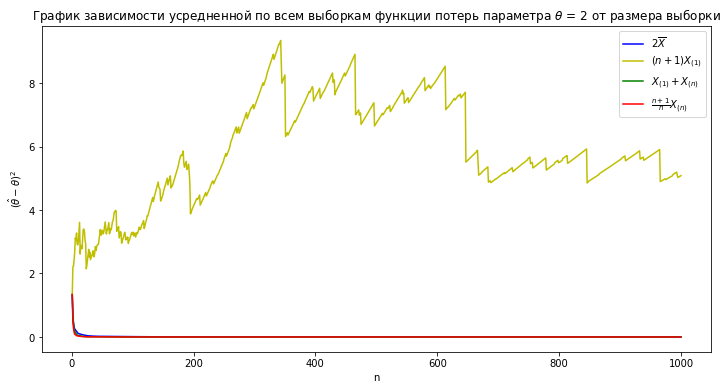

In [179]:
MakePlot(estimators, theta)

Как видно из графика, оценка $(n + 1)X_{(1)}$ сильно отличается от истинного значения. Это связано с тем, что матожидание ее квадратичной функции потерь равна $\frac{n \theta ^ 2}{n + 2}$, которая в пределе стремится к $\theta^2$, в то время, как остальные оценки стремятся к нулю. Рассмотрим эти стремления более подробно, выкинув из графика оценку $(n + 1)X_{(1)}$

In [180]:
def MakePlotWithoutSecond(estimators, ylim, theta):
    x = range(1, N + 1)
    plt.figure(figsize=(12, 6))
    
    new_estimators = np.delete(estimators, 1, 0)
    
    names = [r'$2\overline{X}$', r'$X_{(1)} + X_{(n)}$', \
             r'$\frac{n + 1}{n}X_{(n)}$']
    
    for estimator, color, name in zip(new_estimators, ['b', 'g', 'r'], names):
        plt.plot(x, [np.mean((estimator[n] - theta) ** 2) for n in range(N)],
                 color, label=name)
    
    plt.title(r"""График зависимости усредненной по всем выборкам функции потерь 
    параметра $\theta$ = {} от размера выборки""".format(theta))
    plt.xlabel("n")
    plt.ylabel(r"$\overline{(\theta* - \theta)^2}$")
    plt.ylim(0, ylim)
    plt.legend(loc='best');

Построим график без учета второй оценки, а также уменьшим масштаб по $y$:

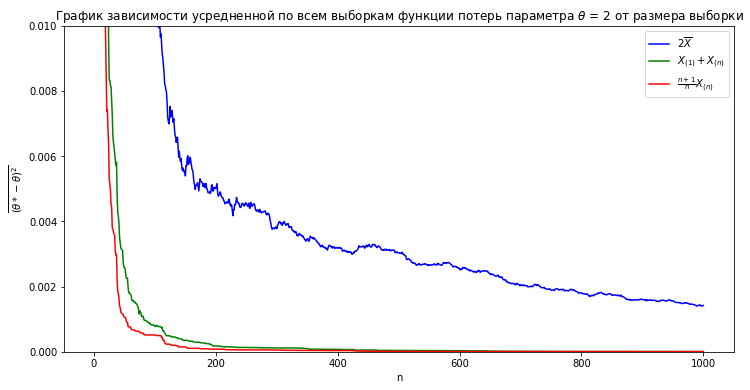

In [181]:
MakePlotWithoutSecond(estimators, 0.01, theta)

$\textbf{Вывод:}$ Как видно из графика, усредненная квадратичная функция потерь для оценки $2\overline{X}$ стремится к нулю медленее, чем остальные. Это связано с тем, что матожидание данной функции для $2\overline{X}$ равно $\frac{\theta^2}{3n}$, то есть пропорциональна $\frac{1}{n}$, в то время, как для оценки $\frac{n + 1}{n}X_{(n)}$ матожидание квадратичной функции потерь равно $\frac{\theta^2}{n (n+2)}$, то есть пропорционально $\frac{1}{n (n + 2)}$. Таким образом усредненные квадратичные функции потерь оценок $X_{(1)} + X_{(n)}$, $\frac{n + 1}{n}X_{(n)}$ на графике стремятся к нулю быстрее, чем усредненная функция потерь оценки $2\overline{X}$.

Проведем те же опыты для $\theta = 10, 100$

In [183]:
theta = 10
samples = CreateSamples(theta)

In [184]:
estimators = CreateEstimators(samples)

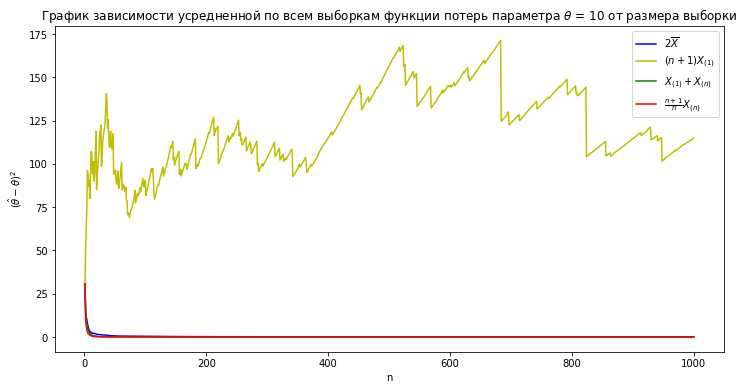

In [185]:
MakePlot(estimators, theta)

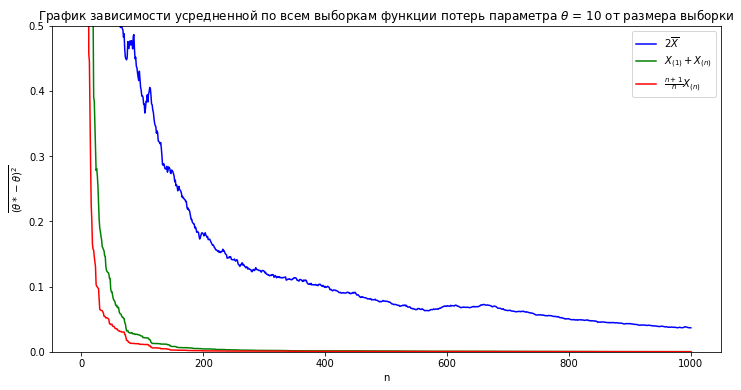

In [188]:
MakePlotWithoutSecond(estimators, 0.5, theta)

In [192]:
theta = 100
samples = CreateSamples(theta)

In [193]:
estimators = CreateEstimators(samples)

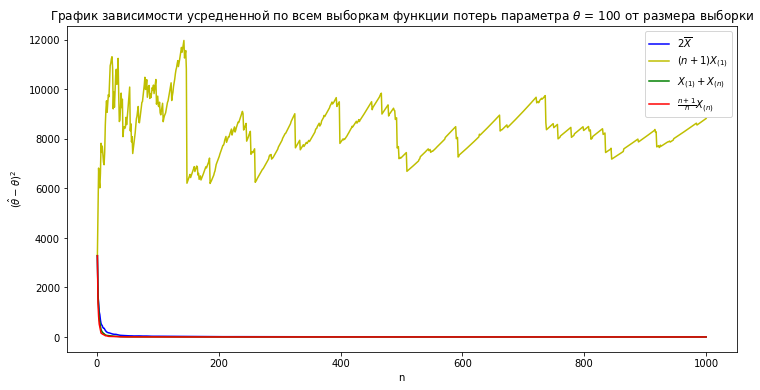

In [194]:
MakePlot(estimators, theta)

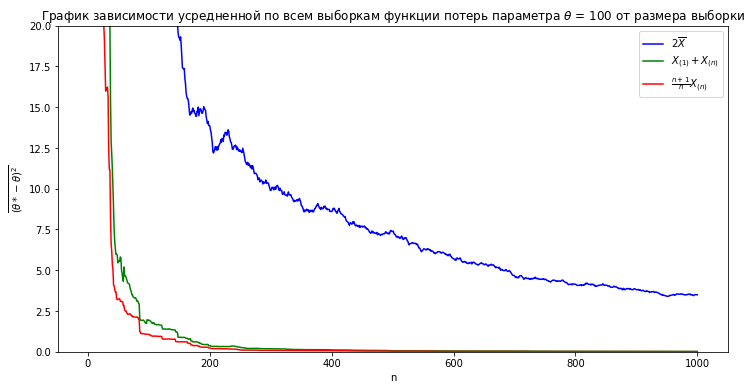

In [198]:
MakePlotWithoutSecond(estimators, 20, theta)

$\textbf{Вывод:}$ Как видно из графиков, для разных значений параметра $\theta$ все наши предположения сделанные для $\theta = 2$ сохраняются, следовательно можно сделать вывод, что теоретические данные совпали с практическими.